In [134]:
import numpy as np
import random as rd
import math
import pandas as pd
import matplotlib.pyplot as plt

vmax = 6
vmin = -6
wmax = 0.9
wmin = 0.4

Dữ liệu ngẫu nhiên

In [135]:
prices = [3, 2, 5, 4, 7, 2]
weights = [4, 2, 4, 1, 3, 5]

#1. Khởi tạo quần thể

In [136]:
def initialPopulation(numItem, popSize):
    population = []
    for i in range(popSize):
        individual = []
        for j in range(numItem):
            r = rd.random()
            if (r < 0.5):
                individual.append(0)
            else:
                individual.append(1)
        population.append(individual)
    return population

Test

In [137]:
print(initialPopulation(2, 3))

[[0, 0], [0, 0], [1, 1]]


#2. Mã hóa cá thể và hàm thích nghi

In [138]:
def decodeIndividual(individual):
    individual2 = []
    for i in range(len(individual)):
        if individual[i] < 0.5:
            individual2.append(0)
        else:
            individual2.append(1)
    return individual2

In [139]:
def fitness(individual, prices, weights, capacity):
    totalPrice = 0
    totalWeight = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            # print(i)
            totalPrice += prices[i]
            totalWeight += weights[i]
    if totalWeight > capacity:
        return 0
    return totalPrice

Test

In [140]:
individual = [1, 0.3, 0.5, 0.2, 0.4, 0.7]
print(decodeIndividual(individual))
print(prices)
print(weights)
print(fitness(individual, prices, weights, capacity=12))

[1, 0, 1, 0, 0, 1]
[3, 2, 5, 4, 7, 2]
[4, 2, 4, 1, 3, 5]
3


#3. Đánh dấu Gbest

In [ ]:
def findGbest(Pbest, prices, weights, capacity):
    Gbest = Pbest[0].copy()
    for i in range(len(Pbest)):
        if fitness(Pbest[i], prices, weights, capacity) > fitness(Gbest, prices, weights, capacity):
            Gbest = Pbest[i].copy()
    return Gbest

In [ ]:
def findPbest(population, Pbest, prices, weights, capacity):
    for i in range(len(Pbest)):
        if fitness(population[i], prices, weights, capacity) > fitness(Pbest[i], prices, weights, capacity):
            Pbest[i] = population[i].copy()
    return Pbest

Test

In [143]:
population = initialPopulation(numItem=6, popSize=10)
print(population)
Gbest = findGbest(population, prices, weights, capacity=20)
print(fitness(Gbest, prices, weights, capacity=20))
print(Gbest)

[[0, 0, 1, 1, 0, 1], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 1], [0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 1, 1], [0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1], [1, 0, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1]]
6
[0, 0, 0, 1, 0, 1]


#4. Cập nhật vận tốc

In [ ]:
def updateVelocity(population, velocity, c1, c2, Gbest, Pbest, w):
    for i in range(len(population)):
        for j in range(len(population[i])):
            r1 = rd.random()
            r2 = rd.random()
            velocity[i][j] = velocity[i][j] * w + c1 * r1 * (Pbest[i][j] ^ population[i][j]) + c2 * r2 * (Gbest[j] ^ population[i][j])
            if velocity[i][j] > vmax:
                velocity[i][j] = vmax
            elif velocity[i][j] < vmin:
                velocity[i][j] = vmin
    return velocity

Test

In [145]:
# velocity = [[0 for _ in range(6)] for _ in range(10)]
# print(velocity)
# population = initialPopulation(numItem=6, popSize=10)
# print(population)
# velocity = updateVelocity(population, velocity, c1=2, c2=2, Gbest=findGbest(population, prices, weights, capacity=20), Pbest=population)
# print(findGbest(population, prices, weights, capacity=20))
# print(velocity)

#5. Cập nhật vị trí

In [146]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [147]:
def updatePopulation(population, velocity, c1, c2, Gbest, Pbest, w):
    velocity = updateVelocity(population, velocity, c1, c2, Gbest, Pbest, w)
    for i in range(len(population)):
        for j in range(len(population[i])):
            r = rd.random()
            if r < sigmoid(velocity[i][j]):
                population[i][j] = 1
            else:
                population[i][j] = 0
    return population

Test

In [148]:
# velocity = [[0 for _ in range(6)] for _ in range(10)]
# population = initialPopulation(numItem=6, popSize=10)
# print(population)
# # print(findGbest(population, prices, weights, capacity=20))
# population = updatePopulation(population, velocity, c1=2, c2=2, Gbest=findGbest(population, prices, weights, capacity=20), Pbest=population)
# print(population)
# print(findGbest(population, prices, weights, capacity=20))

#6. Thuật toán chính

In [149]:
def PSO(numItem, popSize, c1, c2, prices, weights, capacity, maxLoop, generations, w):
    population = initialPopulation(numItem, popSize)
    Gbest = findGbest(population, prices, weights, capacity)
    Pbest = population.copy()
    velocity = [[0 for _ in range(numItem)] for _ in range(popSize)]
    curLoop = 0
    curPrice = 0

    progress = []
    progress.append(fitness(Gbest, prices, weights, capacity))
    print("Generation ", 0, fitness(Gbest, prices, weights, capacity))

    for i in range(generations):
        w = wmin + (wmax - wmin) * i / generations
        population = updatePopulation(population, velocity, c1, c2, Gbest, Pbest, w)
        u = findGbest(population, prices, weights, capacity)
        if (fitness(u, prices, weights, capacity) > fitness(Gbest, prices, weights, capacity)):
            Gbest = u.copy()
        Pbest = findPbest(population, Pbest, prices, weights, capacity)
        if fitness(Gbest, prices, weights, capacity) == curPrice:
            curLoop += 1
            if curLoop == maxLoop:
                break
        else:
            curPrice = fitness(Gbest, prices, weights, capacity)
            curLoop = 1
        
        progress.append(fitness(Gbest, prices, weights, capacity))
        print("Generation ", i + 1, fitness(Gbest, prices, weights, capacity))
    
    plt.ylabel('Price')
    plt.xlabel('Generation')
    plt.plot(progress)
    plt.show()

#7. Chạy thuật toán

In [150]:
# PSO(numItem=6, popSize=10, c1=0.7, c2=0.8, prices=prices, weights=weights, capacity=20, maxLoop=10, generations=100)

0      585
1      194
2      426
3      606
4      348
      ... 
495    263
496    406
497    601
498    134
499    577
Name: price, Length: 500, dtype: int64
0      485
1       94
2      326
3      506
4      248
      ... 
495    163
496    306
497    501
498     34
499    477
Name: weight, Length: 500, dtype: int64
Generation  0 133833
Generation  1 149304
Generation  2 156049
Generation  3 162338
Generation  4 162338
Generation  5 190212
Generation  6 190212
Generation  7 190212
Generation  8 190212
Generation  9 190212
Generation  10 192202
Generation  11 192202
Generation  12 192202
Generation  13 192202
Generation  14 192202
Generation  15 192202
Generation  16 192202
Generation  17 192322
Generation  18 192322
Generation  19 192322
Generation  20 192322
Generation  21 192322
Generation  22 192322
Generation  23 192322
Generation  24 193370
Generation  25 193370
Generation  26 193370
Generation  27 193370
Generation  28 193370
Generation  29 193370
Generation  30 193370
Generat

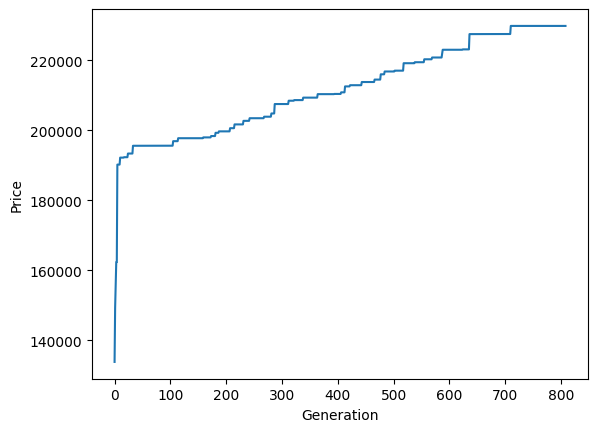

In [151]:
df = pd.read_csv('knapPI_3_500_1000_1_items.csv')
df.columns = [c.strip() for c in df.columns]
prices = df['price']
weights = df['weight']

print(prices)
print(weights)

PSO(numItem=500, popSize=80, w = 0.8, c1=2, c2=2, prices=prices, weights=weights, capacity=1000000, maxLoop=100, generations=1000)